In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
%run f2forecast.py

In [3]:
df=pd.read_excel("DatWinterValid.xlsx")
df.head()

,Unnamed: 0,Data,Потребление,Ставка,Температура,Время
0,0,2017-12-01 00:00:00,19.824,2369.47,-13.4,0
1,1,2017-12-01 01:00:00,21.768,2377.11,-13.4,1
2,2,2017-12-01 02:00:00,28.272,2383.17,-13.4,2
3,3,2017-12-01 03:00:00,26.592,2387.40,-12.1,3
4,4,2017-12-01 04:00:00,30.048,2398.73,-12.1,4


In [4]:
ConsWith = []
Stav = []
WorkOrHolid = []

for i in range(len(df["Ставка"])):
    ConsWith.append(df['Потребление'][i])
    Stav.append(df['Ставка'][i])
    if((i<24) or (72<i<192) or (240<i<360) or (408<i<528) or (576<i<696)):
        WorkOrHolid.append(1)
    else:
        WorkOrHolid.append(0)
print(df["Data"][217:336])
#Cons without holiyday
FirstWeek = ConsWith[0:24];
#WeekendsFirstWeek = [24:72];
SecondWeek = ConsWith[72:192];
#WeekendsSecondWeek = [192:240];
ThirdWeek = ConsWith[240:360];
#WeekendsThirdWeek = [360:408];
FourWeek = ConsWith[408:528];
#WeekendsFourWeek = [528:576];
FiveWeek = ConsWith[576:696];
#WeekendsFiveWeek = ConsWith[696:744];

Cons = FirstWeek + SecondWeek + ThirdWeek + FourWeek + FiveWeek;

217   2017-12-10 01:00:00
218   2017-12-10 02:00:00
219   2017-12-10 03:00:00
220   2017-12-10 04:00:00
221   2017-12-10 05:00:00
              ...        
331   2017-12-14 19:00:00
332   2017-12-14 20:00:00
333   2017-12-14 21:00:00
334   2017-12-14 22:00:00
335   2017-12-14 23:00:00
Name: Data, Length: 119, dtype: datetime64[ns]


<h1>Consumption

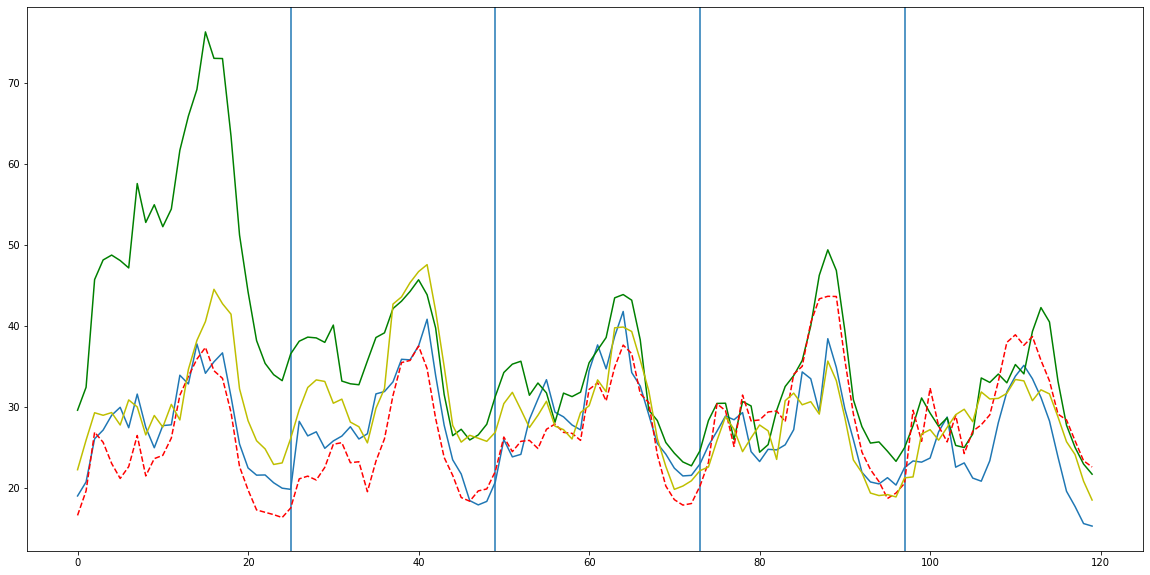

In [5]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)
plt.axvline(x=49)
plt.axvline(x=73)
plt.axvline(x=97)
plt.plot(SecondWeek)
plt.plot(ThirdWeek,'g')
plt.plot(FourWeek,'--r')
plt.plot(FiveWeek,'y')

In [6]:
ConsWEnd = [];
StavWend = [];

FirstWeek = ConsWith[0:24];
#WeekendsFirstWeek = [24:72];
SecondWeek = ConsWith[72:192];
#WeekendsSecondWeek = [192:240];
ThirdWeek = ConsWith[240:360];
#WeekendsThirdWeek = [360:408];
FourWeek = ConsWith[408:528];
#WeekendsFourWeek = [528:576];
FiveWeek = ConsWith[576:696];
#WeekendsFiveWeek = ConsWith[696:744];



CWeekendsFirstWeek = ConsWith[24:72];
SWeekendsFirstWeek = Stav[24:72];

CWeekendsSecondWeek = ConsWith[192:240];
SWeekendsSecondWeek = Stav[192:240];

CWeekendsThirdWeek = ConsWith[360:408];
SWeekendsThirdWeek = Stav[360:408];

CWeekendsFourWeek = ConsWith[528:576];
SWeekendsFourWeek = Stav[528:576];

CWeekendsLastWeek = ConsWith[696:744];
SWeekendsLastWeek = Stav[696:744];

StavWend = SWeekendsFirstWeek + SWeekendsSecondWeek + SWeekendsThirdWeek + SWeekendsFourWeek+SWeekendsLastWeek;
ConsWEnd = CWeekendsFirstWeek + CWeekendsSecondWeek + CWeekendsThirdWeek + CWeekendsFourWeek+CWeekendsLastWeek;

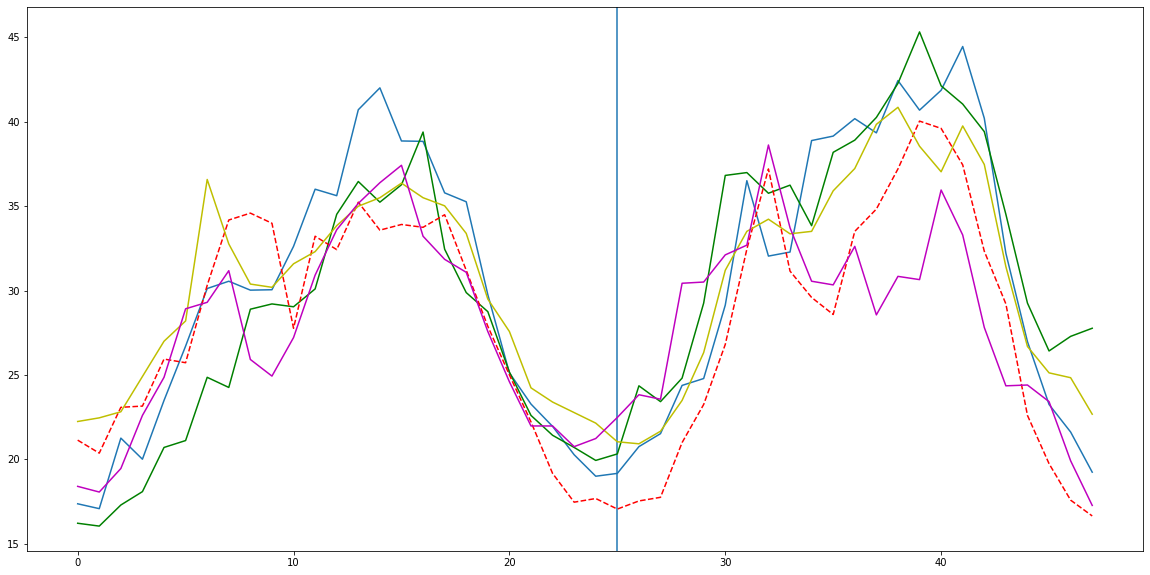

In [7]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)

plt.plot(CWeekendsFirstWeek)
plt.plot(CWeekendsSecondWeek,'g')
plt.plot(CWeekendsThirdWeek,'--r')
plt.plot(CWeekendsFourWeek,'y')
plt.plot(CWeekendsLastWeek,'m')

<h1>Stav

In [8]:
#Cons without holiyday
SFirstWeek = Stav[0:24];
#WeekendsFirstWeek = [24:72];
SSecondWeek = Stav[72:192];
#WeekendsSecondWeek = [192:240];
SThirdWeek = Stav[240:360];
#WeekendsThirdWeek = [360:408];
SFourWeek = Stav[408:528];
#WeekendsFourWeek = [528:576];
SFiveWeek = Stav[576:696];
#WeekendsFiveWeek = ConsWith[696:744];
StavW = SFirstWeek + SSecondWeek + SThirdWeek + SFourWeek + SFiveWeek;

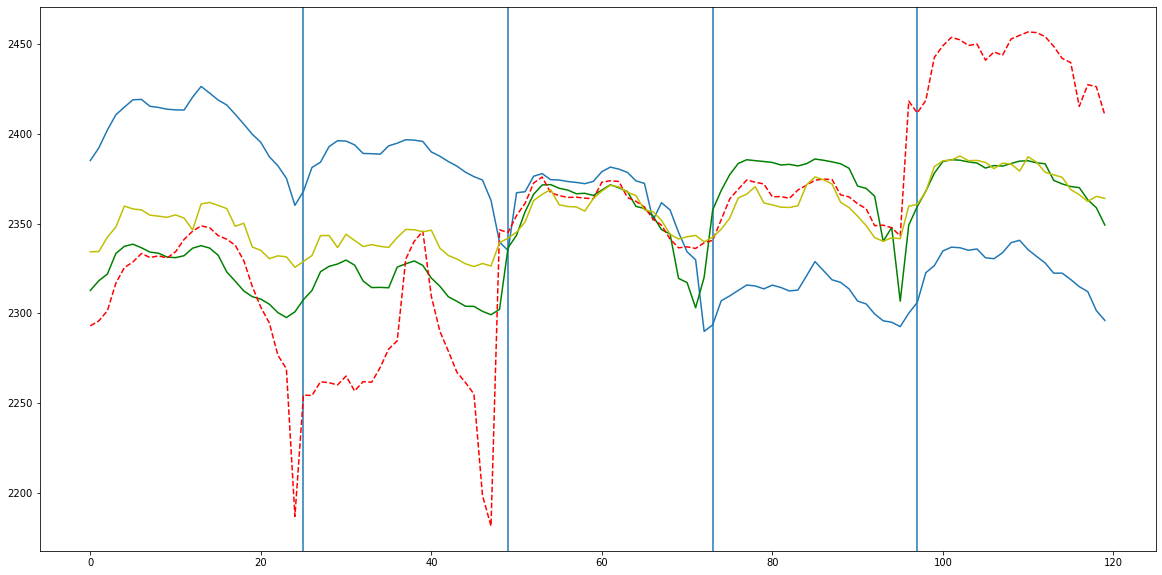

In [9]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)
plt.axvline(x=49)
plt.axvline(x=73)
plt.axvline(x=97)
plt.plot(SSecondWeek)
plt.plot(SThirdWeek,'g')
plt.plot(SFourWeek,'--r')
plt.plot(SFiveWeek,'y')

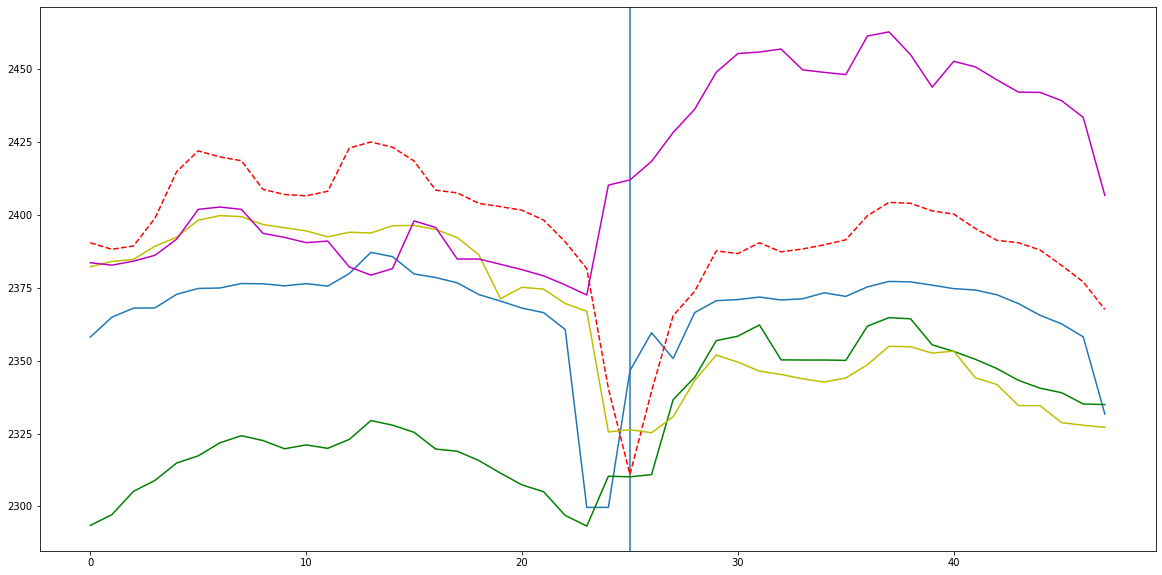

In [10]:
plt.figure(figsize=(20,10))
plt.axvline(x=25)

plt.plot(SWeekendsFirstWeek)
plt.plot(SWeekendsSecondWeek,'g')
plt.plot(SWeekendsThirdWeek,'--r')
plt.plot(SWeekendsFourWeek,'y')
plt.plot(SWeekendsLastWeek,'m')

In [11]:
Temp=[]
for i in range(len(df['Температура'])):
    Temp.append(df['Температура'][i])
    
print(len(Temp))

744


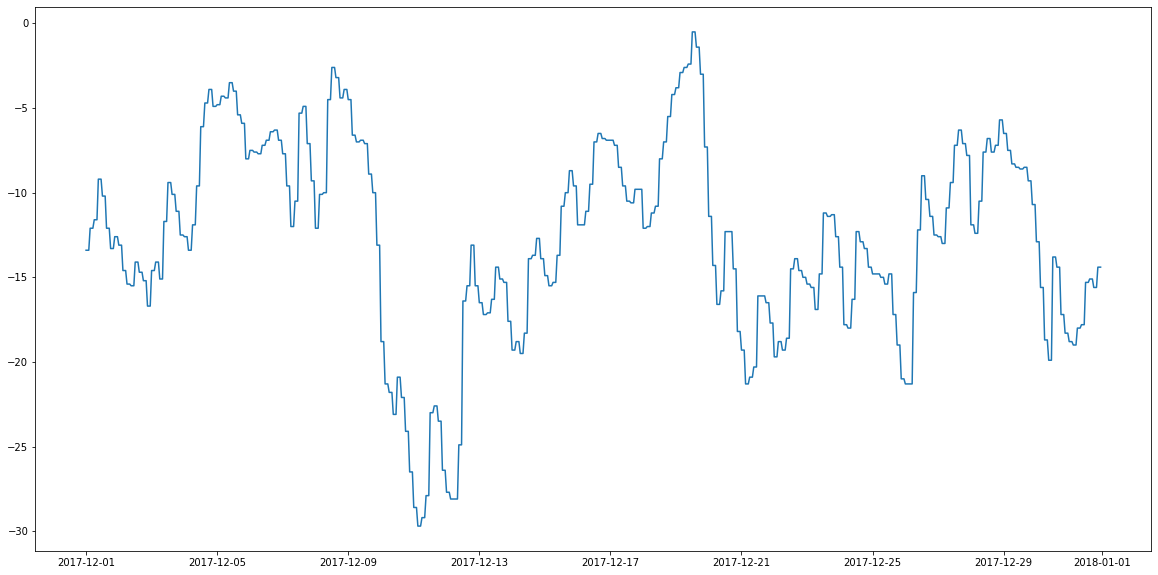

In [12]:
plt.figure(figsize=(20,10))
data=df['Data']
plt.plot(data,Temp)

In [13]:
df['Температура'].describe()

count    744.000000
mean     -12.754032
std        5.852251
min      -29.700000
25%      -15.950000
50%      -12.500000
75%       -8.000000
max       -0.500000
Name: Температура, dtype: float64

<h1>Quality

In [14]:
df.head()

,Unnamed: 0,Data,Потребление,Ставка,Температура,Время
0,0,2017-12-01 00:00:00,19.824,2369.47,-13.4,0
1,1,2017-12-01 01:00:00,21.768,2377.11,-13.4,1
2,2,2017-12-01 02:00:00,28.272,2383.17,-13.4,2
3,3,2017-12-01 03:00:00,26.592,2387.40,-12.1,3
4,4,2017-12-01 04:00:00,30.048,2398.73,-12.1,4


In [15]:
df["Потребление"].describe()

count    744.000000
mean      29.850839
std        8.138943
min       15.336000
25%       24.234000
50%       29.016000
75%       34.086000
max       76.344000
Name: Потребление, dtype: float64

In [16]:
MaxCons = max(ConsWith)
MinCons = min(ConsWith)

print("Максимум Потребления: ")
print(max(ConsWith))
print(df['Data'][int(ConsWith.index(MaxCons))])

print("Минимум Потребления: ")
print(min(ConsWith))
print(df['Data'][int(ConsWith.index(MinCons))])

Максимум Потребления: 
76.344
2017-12-11 15:00:00
Минимум Потребления: 
15.336
2017-12-08 23:00:00


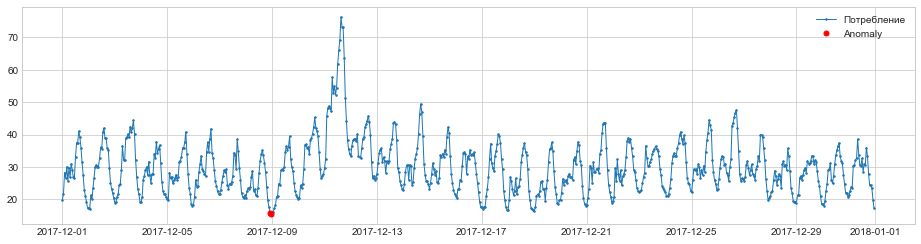

In [17]:
df=pd.read_excel("DatWinterValid.xlsx",index_col="Data", parse_dates=True, squeeze=True)
threshold_ad = ThresholdAD(high=80, low=16)
anomalies = threshold_ad.detect(df['Потребление'])
plot(df['Потребление'], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [18]:
anomalies[anomalies]

Data
2017-12-08 22:00:00    True
2017-12-08 23:00:00    True
Name: Потребление, dtype: bool

In [19]:
df=pd.read_excel("DatWinterValid.xlsx")

In [20]:
print(df['Data'][216:216+24])

216   2017-12-10 00:00:00
217   2017-12-10 01:00:00
218   2017-12-10 02:00:00
219   2017-12-10 03:00:00
220   2017-12-10 04:00:00
221   2017-12-10 05:00:00
222   2017-12-10 06:00:00
223   2017-12-10 07:00:00
224   2017-12-10 08:00:00
225   2017-12-10 09:00:00
226   2017-12-10 10:00:00
227   2017-12-10 11:00:00
228   2017-12-10 12:00:00
229   2017-12-10 13:00:00
230   2017-12-10 14:00:00
231   2017-12-10 15:00:00
232   2017-12-10 16:00:00
233   2017-12-10 17:00:00
234   2017-12-10 18:00:00
235   2017-12-10 19:00:00
236   2017-12-10 20:00:00
237   2017-12-10 21:00:00
238   2017-12-10 22:00:00
239   2017-12-10 23:00:00
Name: Data, dtype: datetime64[ns]


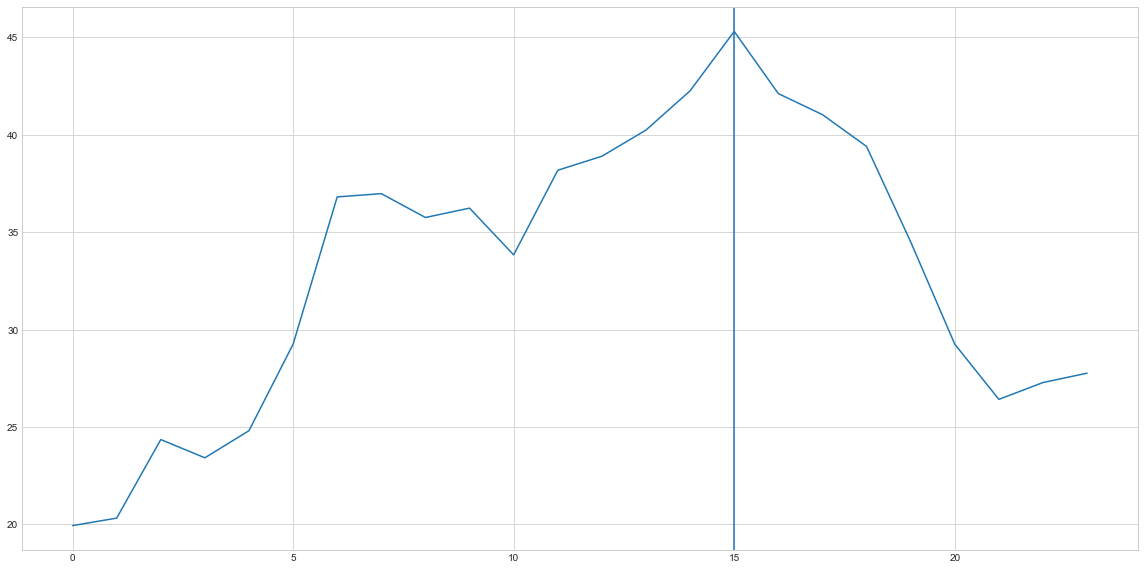

In [21]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(ConsWith[216:216+24])

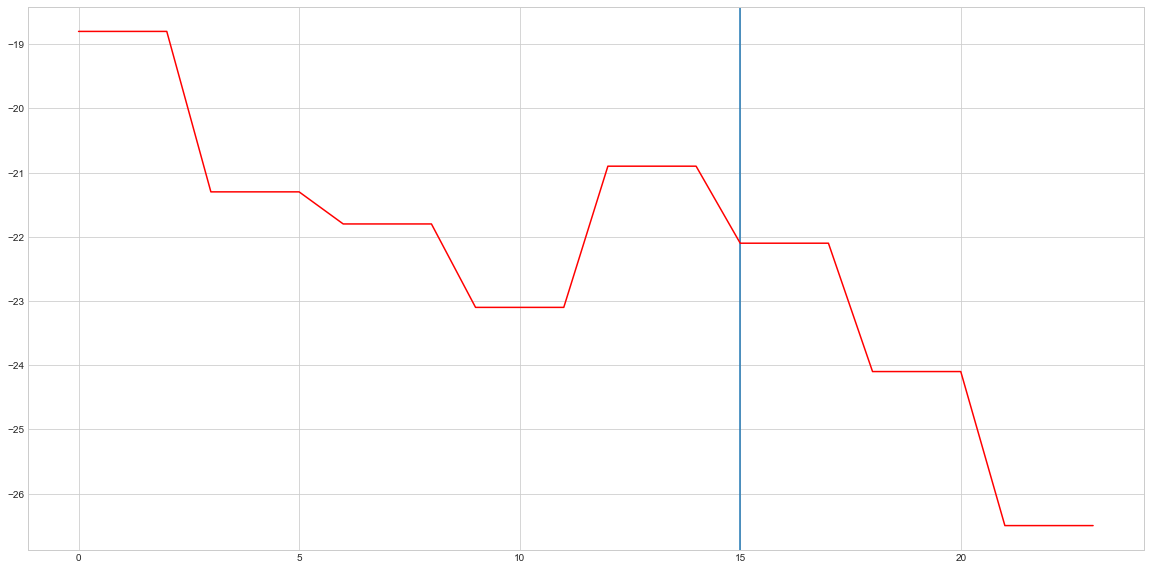

In [22]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(Temp[216:216+24],'r')

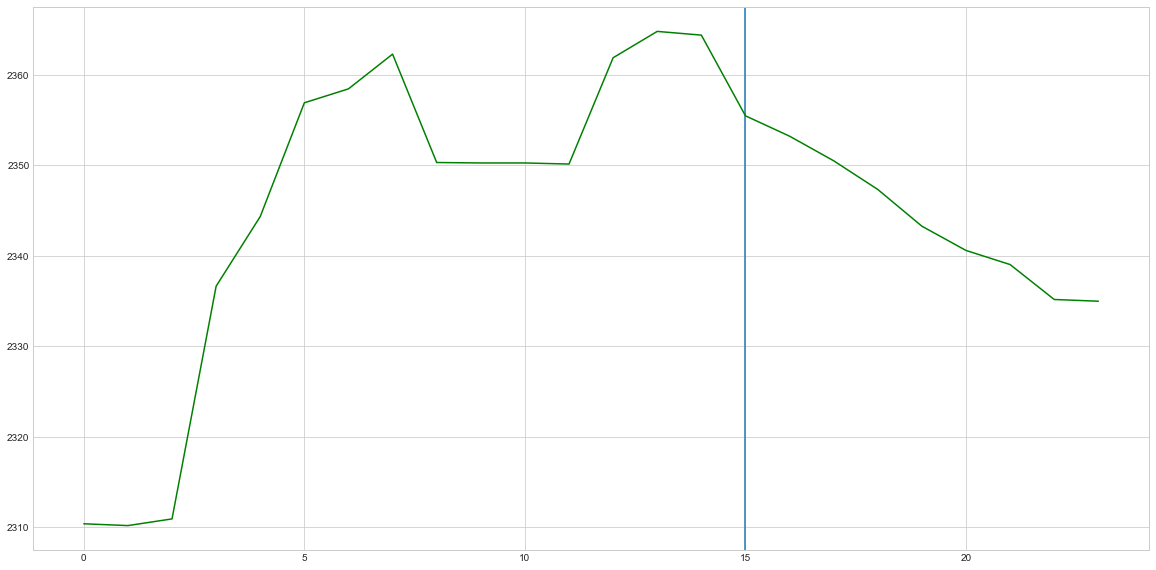

In [23]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(Stav[216:216+24],'g')

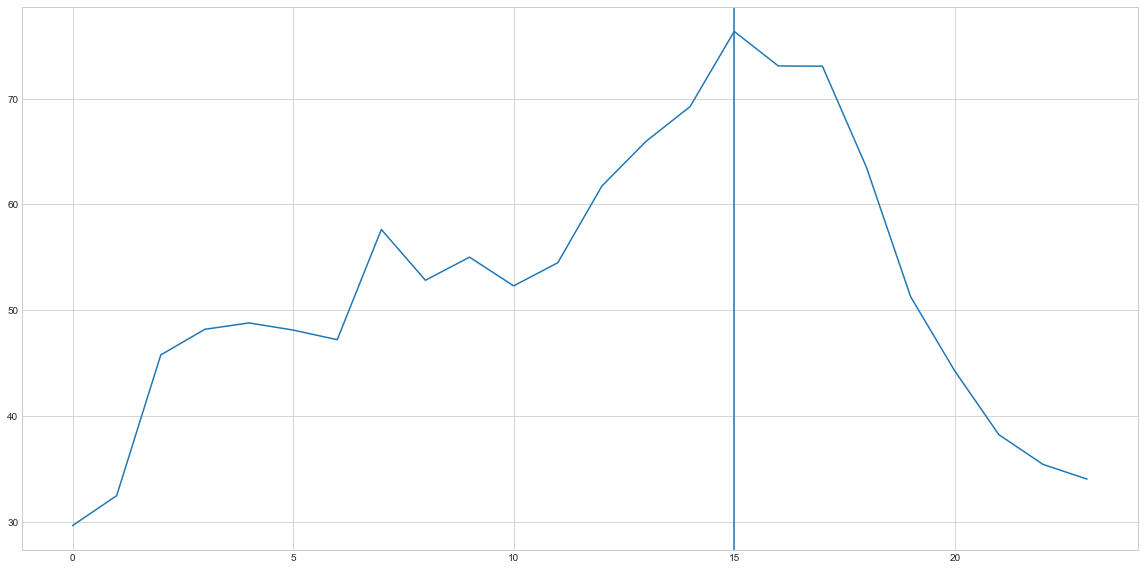

In [24]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(ConsWith[216+24:216+24+24])

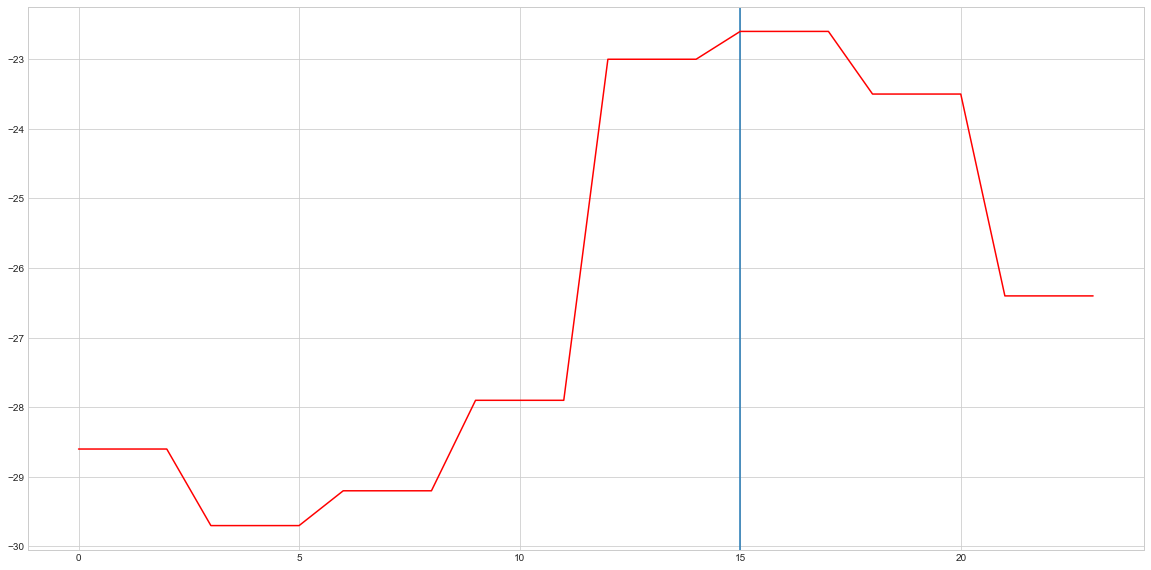

In [25]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(Temp[216+24:216+24+24],'r')

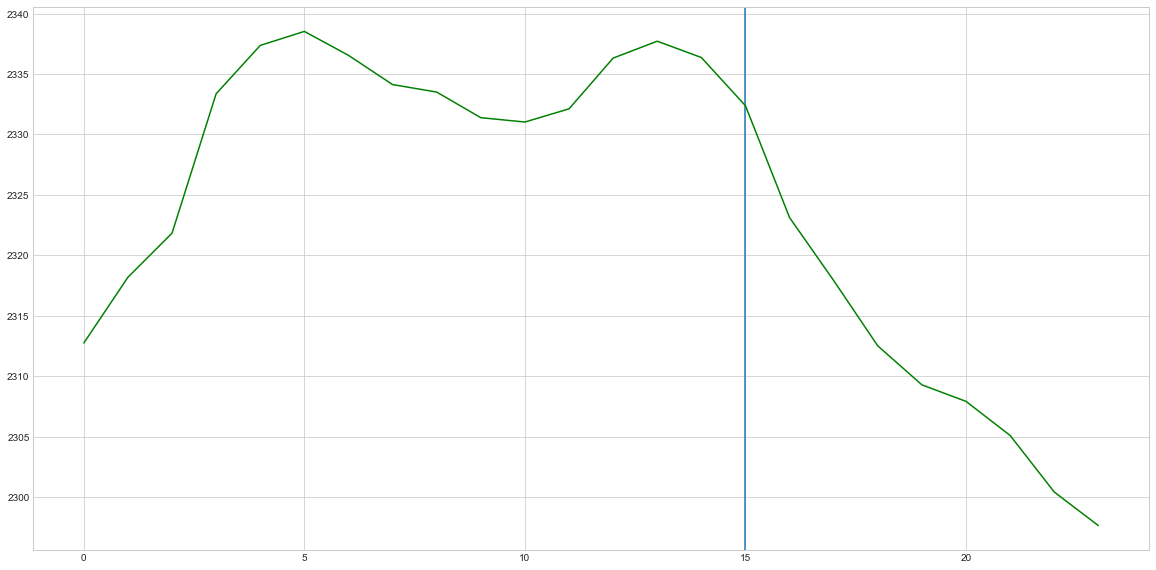

In [26]:
plt.figure(figsize=(20,10))
plt.axvline(x=15)
plt.plot(Stav[216+24:216+24+24],'g')

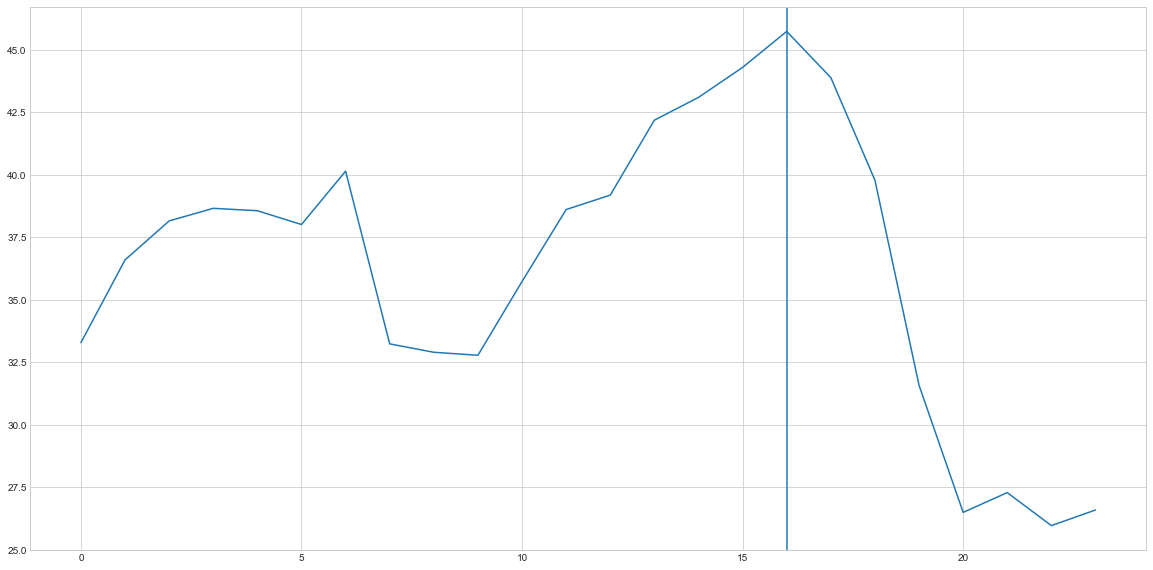

In [27]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(ConsWith[216+24+24:216+24+24+24])

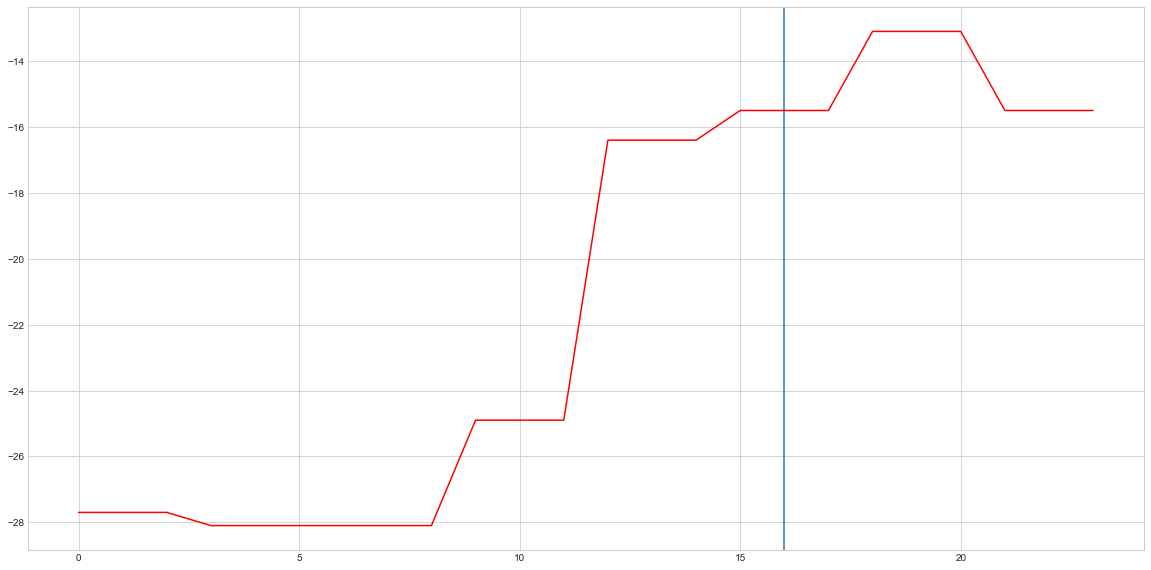

In [28]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(Temp[216+24+24:216+24+24+24],"r")

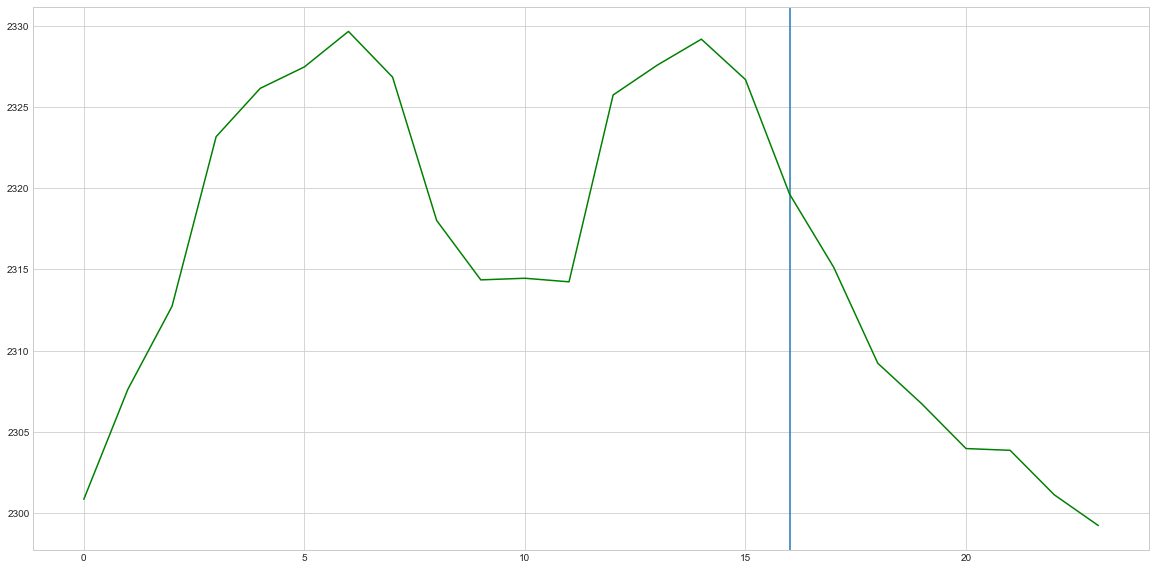

In [29]:
plt.figure(figsize=(20,10))
plt.axvline(x=16)
plt.plot(Stav[216+24+24:216+24+24+24],"g")

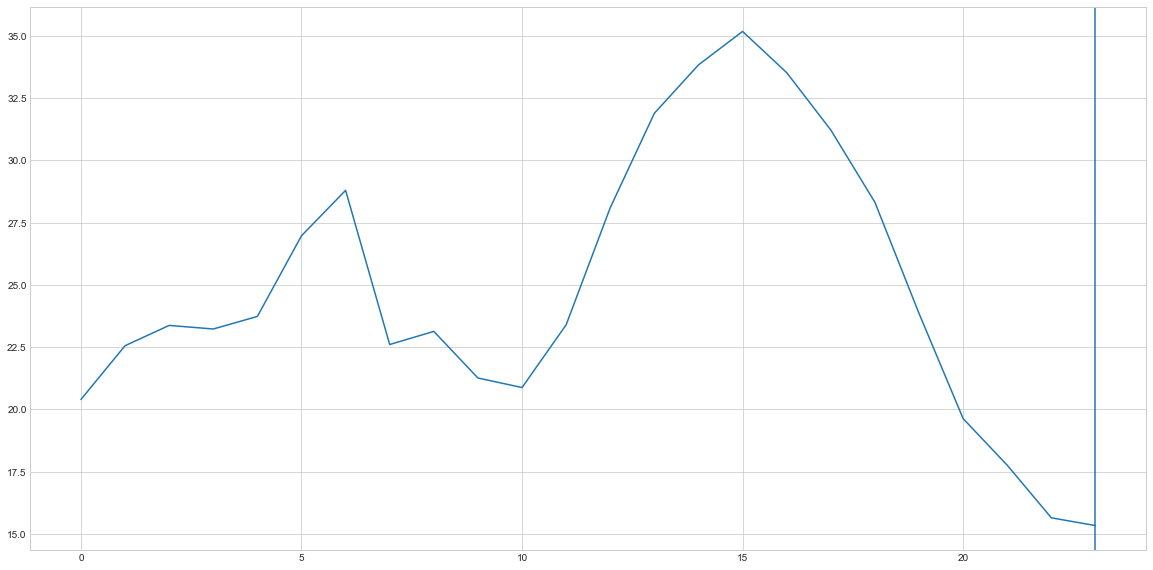

In [30]:
plt.figure(figsize=(20,10))
plt.axvline(x=23)
plt.plot(ConsWith[216-24-24:216-24])

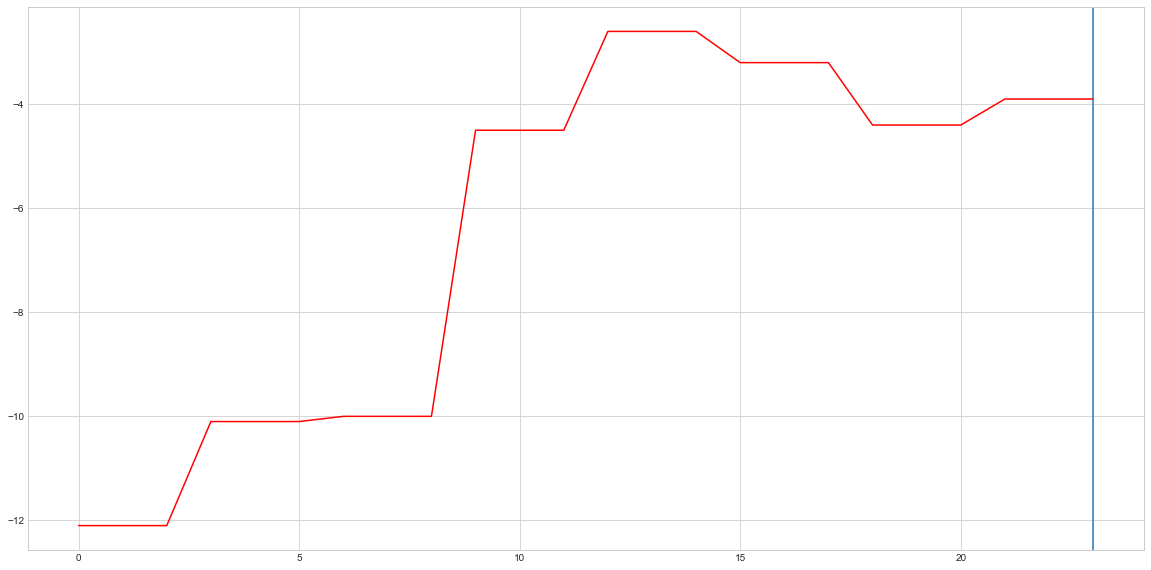

In [31]:
plt.figure(figsize=(20,10))
plt.axvline(x=23)
plt.plot(Temp[216-24-24:216-24],"r")

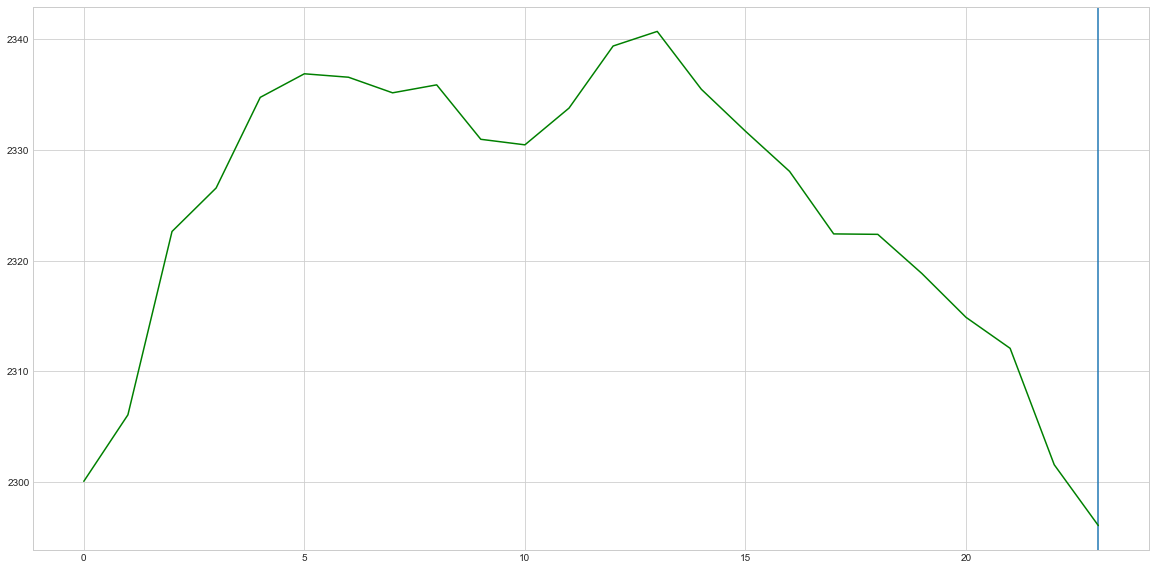

In [32]:
plt.figure(figsize=(20,10))
plt.axvline(x=23)
plt.plot(Stav[216-24-24:216-24],"g")

In [33]:
LessStav = [];
for i in range(len(Stav)):
    LessStav.append(Stav[i]/25)

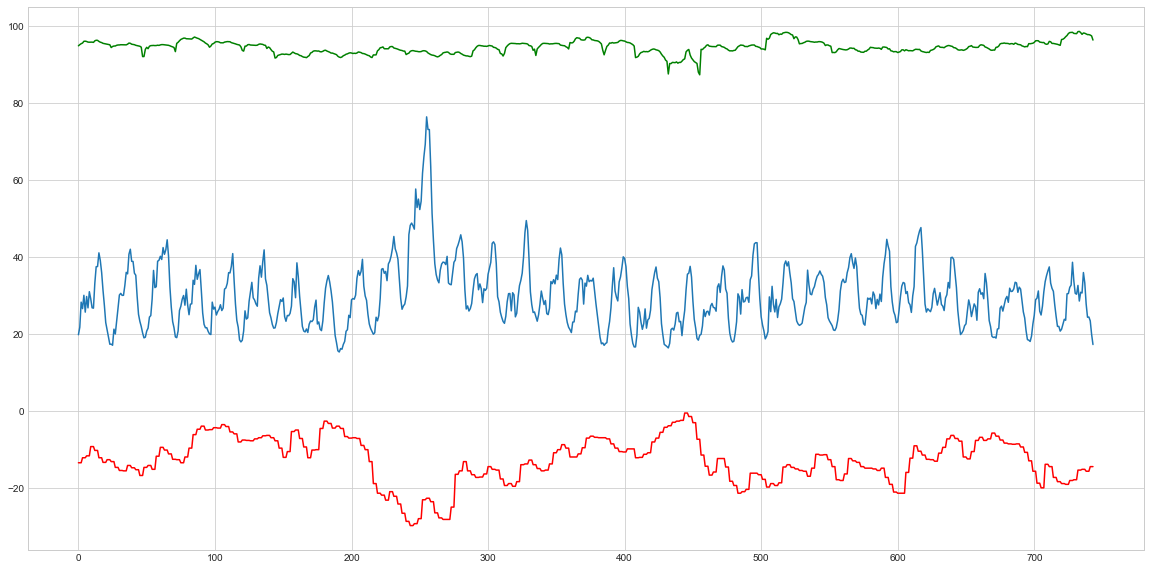

In [34]:
plt.figure(figsize=(20,10))
plt.plot(ConsWith)
plt.plot(Temp,"r")
plt.plot(LessStav,"g")


<h1>Корреляционный анализ 

In [35]:
#Добавим переменную "Час"
Hour=[]
flag=0;
for i in range(len(df['Ставка'])):
    Hour.append(flag);
    flag+=1;
    if(flag==24):
        flag=0
print(len(Hour))
DF = pd.DataFrame({'Data': data, 'Потребление':ConsWith , "Ставка":Stav,"Температура":Temp,"Время":Hour,"Рабочий/Выходной":WorkOrHolid})

744


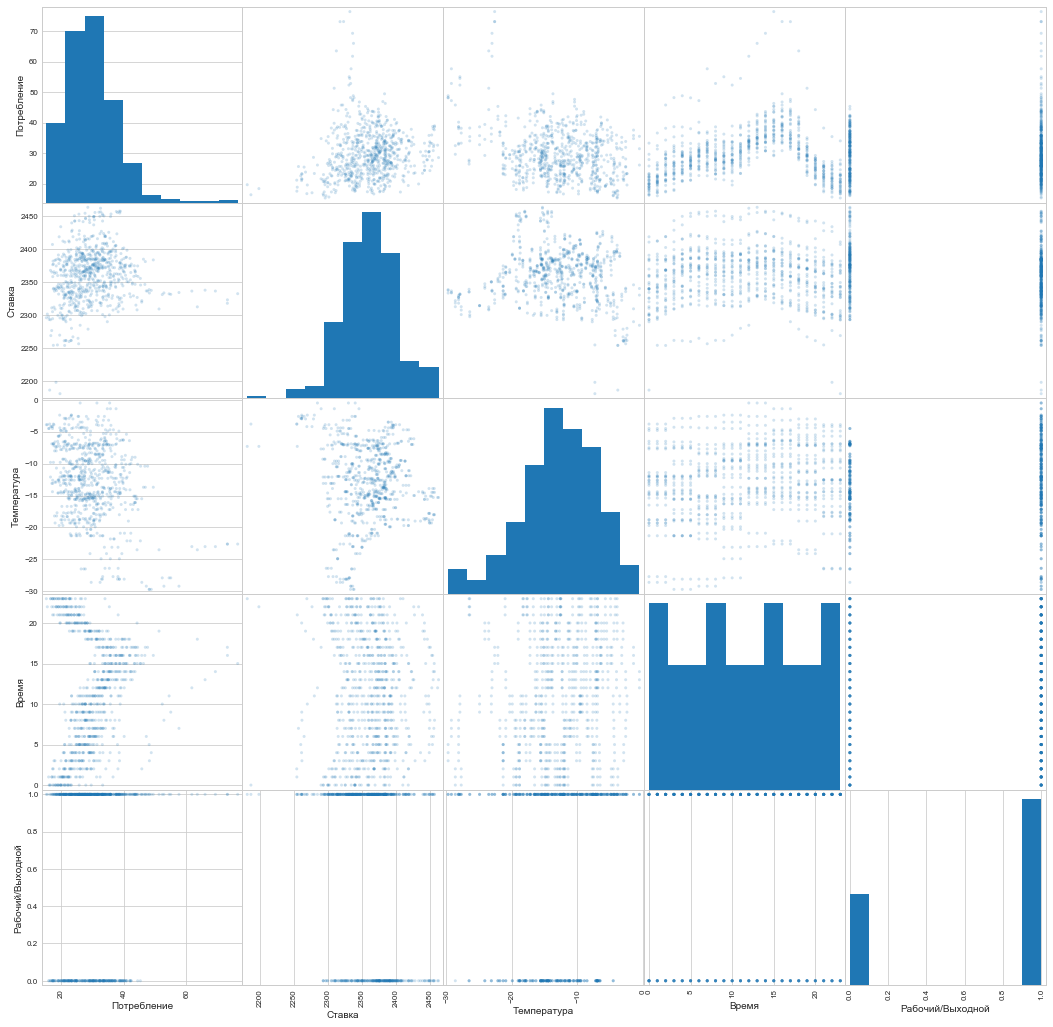

In [36]:
scatter_matrix(DF[['Data', 'Потребление', 'Ставка', 'Температура',"Время","Рабочий/Выходной"]], figsize=(18,18), alpha=0.2)
plt.show()

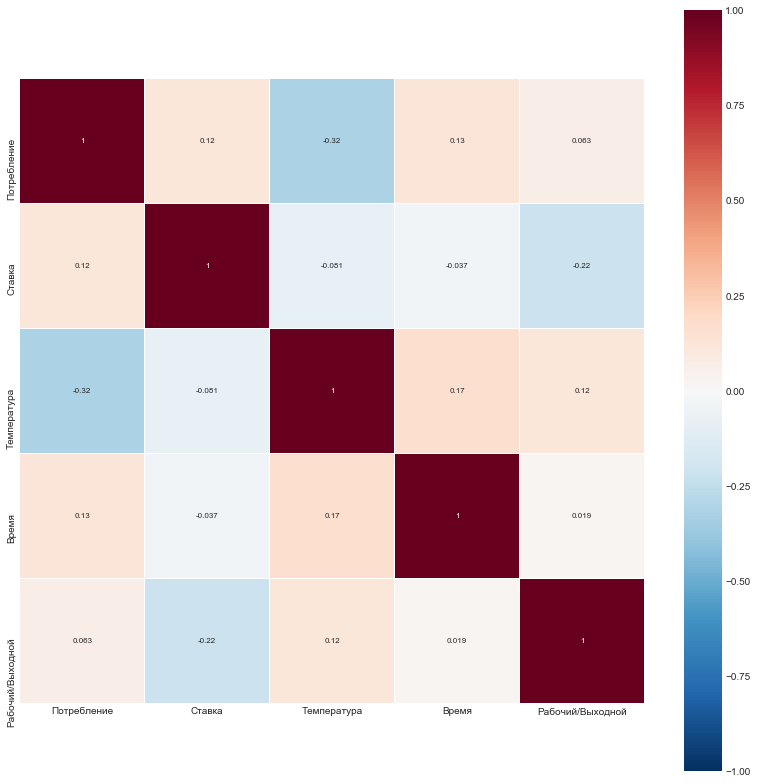

In [37]:
h_map(DF, 0)

<h1>RandomForest

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [39]:
inputdf = DF.filter(items=[#'Data', 
    'Потребление', 'Ставка', 'Температура',"Время","Рабочий/Выходной"])

In [40]:
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
features.columns

Index(['Потребление', 'Ставка', 'Температура', 'Время', 'Рабочий/Выходной'], dtype='object')

In [41]:
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)

In [42]:
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (558, 4)
Форма меток обучения: (558,)
Форма признаков тестирования: (186, 4)
Форма меток тестирования: (186,)


In [43]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')

Средняя абсолютная ошибка: 2.1 кВт.
Точность: 92.68 %.


In [44]:

# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Переменные: Время                Важность: 0.48
Переменные: Температура          Важность: 0.37
Переменные: Ставка               Важность: 0.11
Переменные: Рабочий/Выходной     Важность: 0.04


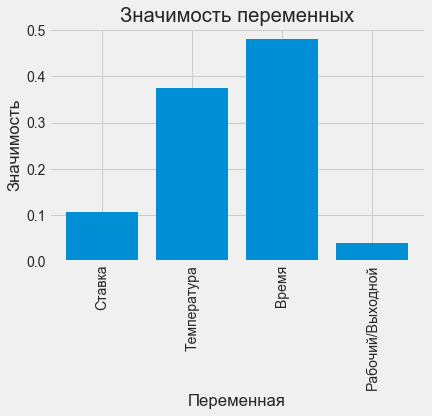

In [45]:
#%matplotlib inline
# Установить стиль
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()